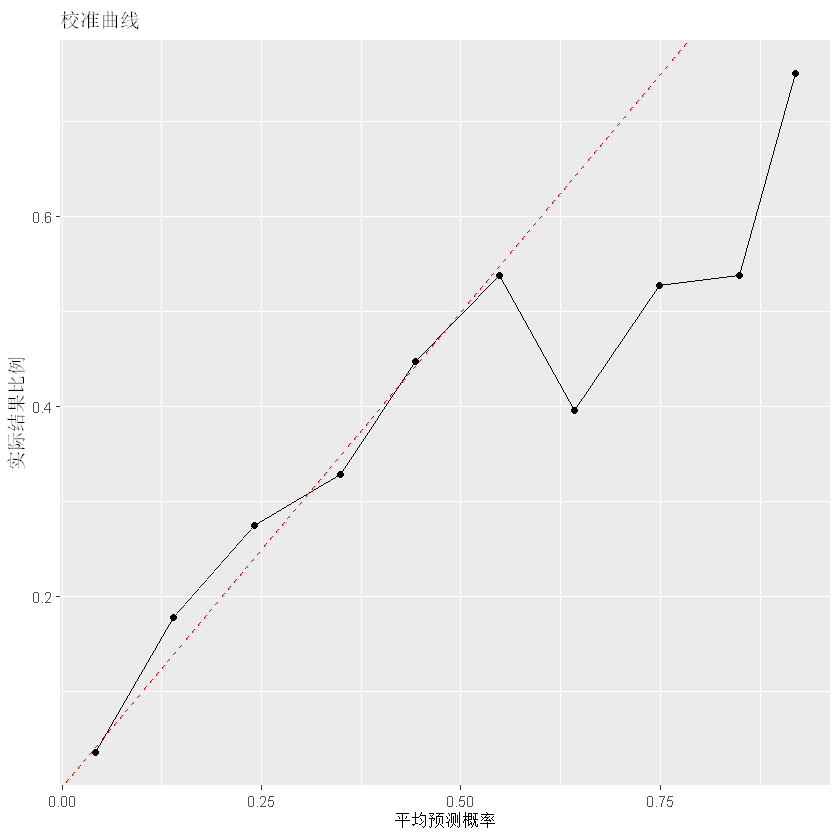

In [5]:
# 加载必要的包
library(ggplot2)

# 读取CSV文件
dca_data <- read.csv("C:\\Users\\fsyan\\Desktop\\predict1.csv")

# 创建一个数据框用于存储分组结果
calibration_data <- data.frame(
  group = numeric(),
  mean_predicted = numeric(),
  mean_observed = numeric()
)

# 使用cut函数将预测概率分成20组
dca_data$group <- cut(dca_data$predict_probability, breaks = seq(0, 1, by = 0.05), include.lowest = TRUE)

# 计算每组的平均预测概率和实际结果的比例
calibration_data <- aggregate(cbind(mean_predicted = dca_data$predict_probability, 
                                    mean_observed = dca_data$origin_encoder) ~ group, 
                              data = dca_data, 
                              FUN = mean)

# ggplot直接绘制校准曲线
ggplot(calibration_data, aes(x = mean_predicted, y = mean_observed)) +
  geom_point() +
  geom_line() +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(x = "平均预测概率", y = "实际结果比例") +
  ggtitle("校准曲线")
